In [1]:
import numpy as np
import pandas as pd

In [4]:
import pandas as pd

# Define the data
data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df


,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [11]:
inputs = df.drop('Play Golf', axis=1)
inputs

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,High,False
1,Rainy,Hot,High,True
2,Overcast,Hot,High,False
3,Sunny,Mild,High,False
4,Sunny,Cool,Normal,False
5,Sunny,Cool,Normal,True
6,Overcast,Cool,Normal,True
7,Rainy,Mild,High,False
8,Rainy,Cool,Normal,False
9,Sunny,Mild,Normal,False


In [12]:
target = df['Play Golf']
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Golf, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le_out = LabelEncoder()
le_tem = LabelEncoder()
le_hum = LabelEncoder()
le_win = LabelEncoder()
le_play = LabelEncoder()

In [15]:
inputs['le_out'] = le_out.fit_transform(inputs['Outlook'])
inputs['le_tem'] = le_tem.fit_transform(inputs['Temp'])
inputs['le_hum'] = le_hum.fit_transform(inputs['Humidity'])
inputs['le_win'] = le_win.fit_transform(inputs['Windy'])
df['Play Golf'] = le_play.fit_transform(df['Play Golf'])

In [16]:
inputs

,Outlook,Temp,Humidity,Windy,le_out,le_tem,le_hum,le_win
0,Rainy,Hot,High,False,1,1,0,0
1,Rainy,Hot,High,True,1,1,0,1
2,Overcast,Hot,High,False,0,1,0,0
3,Sunny,Mild,High,False,2,2,0,0
4,Sunny,Cool,Normal,False,2,0,1,0
5,Sunny,Cool,Normal,True,2,0,1,1
6,Overcast,Cool,Normal,True,0,0,1,1
7,Rainy,Mild,High,False,1,2,0,0
8,Rainy,Cool,Normal,False,1,0,1,0
9,Sunny,Mild,Normal,False,2,2,1,0


In [17]:
inputs_n = inputs.drop(['Outlook', 'Temp', 'Humidity', 'Windy'], axis=1)
inputs_n

,le_out,le_tem,le_hum,le_win
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [18]:
target_n = df['Play Golf']
target_n

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Golf, dtype: int32

In [19]:
from sklearn import tree

In [20]:
model = tree.DecisionTreeClassifier(criterion='entropy')

In [21]:
model.fit(inputs_n, target_n)

DecisionTreeClassifier(criterion='entropy')

In [22]:
import matplotlib.pyplot as plt

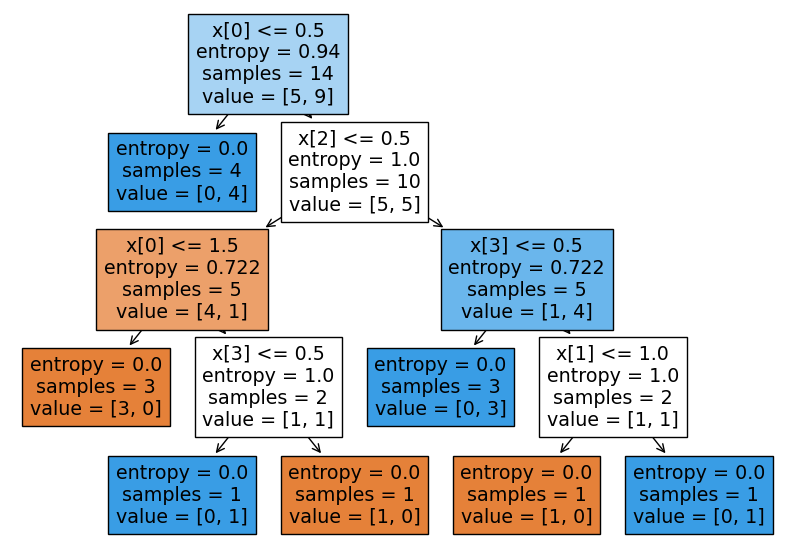

In [23]:
plt.figure(figsize=(10,7))
tree.plot_tree(model, filled=True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(inputs_n, target_n, test_size=0.3, random_state=101)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier(criterion='entropy')

In [28]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
pred_test = model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, pred_test)

0.8

In [32]:
pred_train = model.predict(x_train)
accuracy_score(y_train, pred_train)

1.0

In [33]:
pred = model.predict(inputs_n)
accuracy_score(target_n, pred)

0.9285714285714286

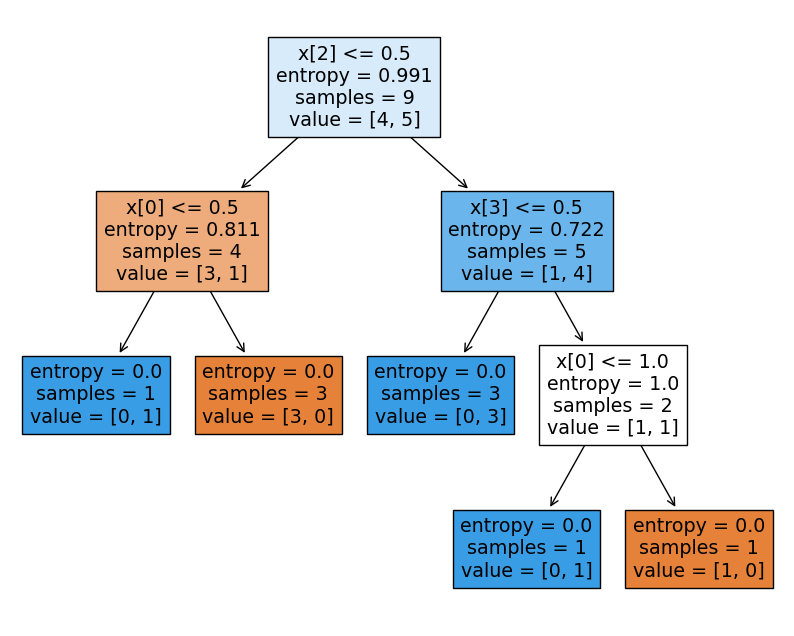

In [34]:
plt.figure(figsize=(10,8))
tree.plot_tree(model, filled=True)
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
confusion_matrix(y_test, pred_test)

array([[1, 0],
       [1, 3]], dtype=int64)

In [37]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [ ]:
#Decision Tree Classifier to predict whether to 
#"Play Golf" based on various weather conditions 
#(Outlook, Temperature, Humidity, and Windiness).
#To build a simple HTML form for predicting whether to 
#"Play Golf" based on user input, you can create a front-end 
#interface that allows users to input weather conditions and
#receive a prediction from your model.